CS 598 Practical Statistical Learning Fall 2025  
Coding Assignment 2  
Group: Manas Gandhi (manaspg2), Neeya Devan, Rahul Kasibhatla  

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from abess import LinearRegression
from sklearn.metrics import mean_squared_error

# Problem 1

In [76]:
rng = np.random.default_rng(seed=773)
beta = np.array([
		1, 0.5, 0, -0.5, -1, 1, 0.5, 2, 0, 0,
		0.1, 0.2, 2, 0, 0, 0, -2, 1, 0, 0
	], dtype=float)


In [77]:
# Problem 1
#a - Generate a data set with p = 20 (independent) covariates, 
# n = 1, 000 observations and an associated quantitative response vector generated according to the model
def generate_simulated_data(n: int = 1000, p: int = 20):
    """
	Generate X (n x p), beta (p,), and Y (n,) according to the assignment specification.

	Returns:
		X: shape (n, p)
		beta: shape (p,)
		Y: shape (n,)
	"""
	#beta vector from assignment
    beta = np.array([
		1, 0.5, 0, -0.5, -1, 1, 0.5, 2, 0, 0,
		0.1, 0.2, 2, 0, 0, 0, -2, 1, 0, 0
	], dtype=float)
	
    X = rng.standard_normal(size=(n, p))
    epsilon = rng.standard_normal(n)

    Y = X.dot(beta) + epsilon
	
    return X, Y
X, Y = generate_simulated_data()

In [78]:
#b - Randomly split your data set into a training set containing 200 observations 
#    and a test set containing 800 observations.
def split_train_test(X: np.ndarray, Y: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
	indices = np.arange(X.shape[0])
	rng.shuffle(indices)
	train_indices = indices[:200]
	test_indices = indices[200:]

	X_train = X[train_indices]
	Y_train = Y[train_indices]
	
	X_test = X[test_indices]
	Y_test = Y[test_indices]
	print("X_train shape:", X_train.shape)
	print("Y_train shape:", Y_train.shape)
	print("X_test shape:", X_test.shape)
	print("Y_test shape:", Y_test.shape)
	
	return X_train, Y_train, X_test, Y_test


X_train, Y_train, X_test, Y_test = split_train_test(X, Y)

X_train shape: (200, 20)
Y_train shape: (200,)
X_test shape: (800, 20)
Y_test shape: (800,)


In [79]:
#c - Perform best subset selection on the training set, and plot the training set
# MSE associated with the best model of each size. 
def best_subset_selection(X_train: np.ndarray, Y_train: np.ndarray, p: int) -> list[float]:
	subset_mse = []
	for k in range(1, p+1):
		model = LinearRegression(support_size=k)
		model.fit(X_train, Y_train)
		yhat = model.predict(X_train)
		mse = mean_squared_error(Y_train, yhat)
		subset_mse.append(mse)

	return subset_mse

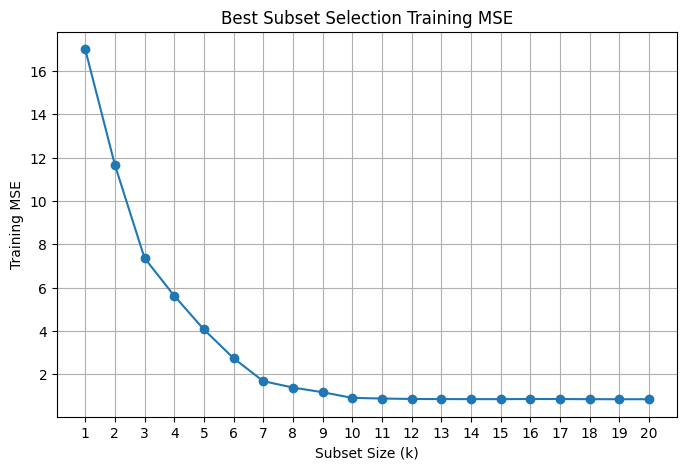

In [80]:
p=20
training_mse = best_subset_selection(X_train, Y_train, p)
plt.figure(figsize=(8, 5))
plt.plot(range(1, p + 1), training_mse, marker='o')
plt.xticks(range(1, p + 1))
plt.xlabel("Subset Size (k)")
plt.ylabel("Training MSE")
plt.title("Best Subset Selection Training MSE")
plt.grid(True)
plt.show()

In [81]:
#d. Plot the test set MSE associated with the best model of each size
def compute_mse(X_train: np.ndarray, Y_train: np.ndarray, X_test: np.ndarray, Y_test: np.ndarray, p:int) -> list[float]:
	subset_mse = []
	for k in range(1, p+1):
		model = LinearRegression(support_size=k)
		model.fit(X_train, Y_train)
		yhat = model.predict(X_test)
		mse = mean_squared_error(Y_test, yhat)
		subset_mse.append(mse)

	return subset_mse
testing_mse = compute_mse(X_train, Y_train, X_test, Y_test, p)

[13.941672143410152, 10.163661519196701, 6.459211826566035, 5.44527300386678, 3.996474835035892, 2.8799962719254517, 1.690626774902248, 1.4455463415548107, 1.2350147205740702, 1.0287218278666674, 1.0031961010558599, 1.0490028036264178, 1.0505684271296984, 1.051695574824598, 1.0539095425067533, 1.0591486967990245, 1.063992508704353, 1.0659234809628209, 1.0644691308682397, 1.0645786185283916]


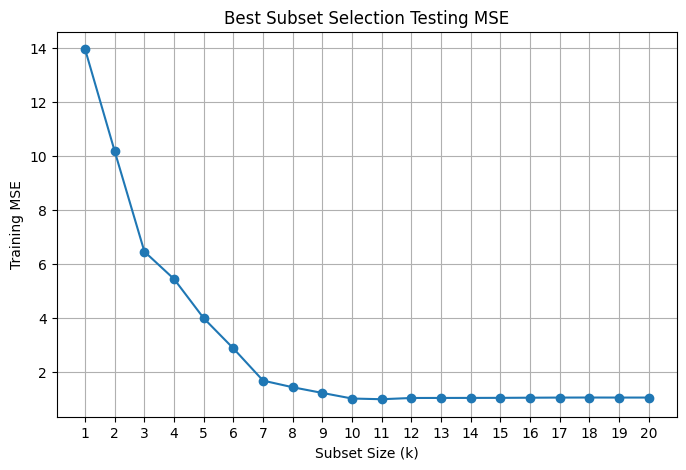

In [82]:
print(testing_mse)
plt.figure(figsize=(8, 5))
plt.plot(range(1, p + 1), testing_mse, marker='o')
plt.xticks(range(1, p + 1))
plt.xlabel("Subset Size (k)")
plt.ylabel("Training MSE")
plt.title("Best Subset Selection Testing MSE")
plt.grid(True)
plt.show()

In [83]:
#e. For which model size does the test set MSE take on its minimum value? Comment on your results.
min_mse = min(testing_mse)
best_size = testing_mse.index(min_mse) + 1
print("The best model size is " + str(best_size))

The best model size is 11


f - How does the model at which the test set MSE is minimized compare to the
true model used to generate the data? Comment on the coefficient values.

The test set MSE takes on its minimum value at a subset size of 11. This makes a lot of sense, given that our beta has 12 values - this means our true model size is 12, so makes sense that the ideal subset size of 11. For the nonzero predictors, the estimated coefficients are probably pretty close to their true values.

Additionally, two of the values in beta are 0.2 and 0.1, which are very small, so it's likely one of these that got missed. This is expected, however, because signals that weak are tough to reliably detect with only 200 training observations.

In [84]:
#g
def coefficient_error(X_train: np.ndarray, Y_train: np.ndarray, beta_true: np.ndarray, p: int) -> list[float]:
    errors = []

    for r in range(1, p + 1):
        model = LinearRegression(support_size=r)
        model.fit(X_train, Y_train)
        beta_hat = model.coef_
        error = np.sum((beta_true - beta_hat) ** 2)
        errors.append(error)

    return errors
errors = coefficient_error(X_train, Y_train, beta, p)

[np.float64(13.213563051761675), np.float64(8.983529101359917), np.float64(5.003858370121281), np.float64(3.978614038042237), np.float64(3.011513649816057), np.float64(1.9759132880209063), np.float64(0.9132534341837901), np.float64(0.6234711196418113), np.float64(0.361709099712503), np.float64(0.11424152017722344), np.float64(0.1027851298482697), np.float64(0.13591059030024302), np.float64(0.1410420792917982), np.float64(0.1407569243685664), np.float64(0.14064128854671112), np.float64(0.14483966573503246), np.float64(0.14799489189501283), np.float64(0.15346361599005845), np.float64(0.15777617884238698), np.float64(0.15767021792445243)]
Lowest error is at subset size 11


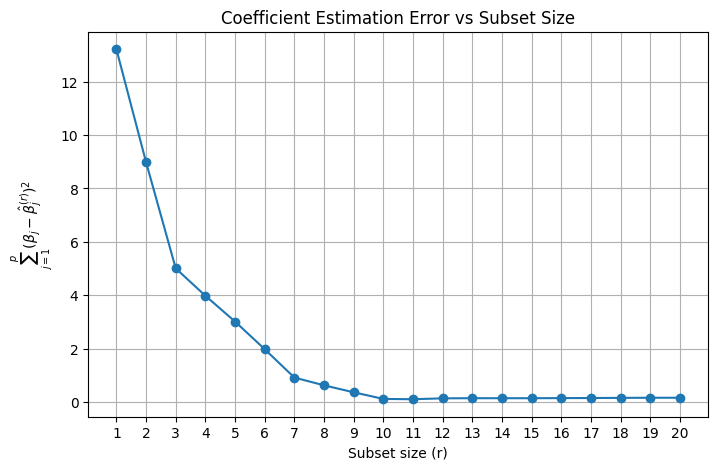

In [85]:
print(errors)
min_error = min(errors)
best_size = errors.index(min_error) + 1
print("Lowest error is at subset size " + str(best_size))
plt.figure(figsize=(8, 5))
plt.plot(range(1, p + 1), errors, marker="o")
plt.xticks(range(1, p + 1))
plt.xlabel("Subset size (r)")
plt.ylabel(r"$\sum_{j=1}^p (\beta_j - \hat{\beta}_j^{(r)})^2$")
plt.title("Coefficient Estimation Error vs Subset Size")
plt.grid(True)
plt.show()


What we can see above that there is a sharp dropoff from subset size 1-7, and reaches a minimum once again at 11. After that, the error flattens out, because the rest of the predictors are irrelevant or 0. The test MSE follows very similar behavior, reaching a minmimum at 11. This makes sense, beacuse, based on our beta array, we have 12 true nonzero coefficients, so that's around where the model should perform the best, and our error should be the lowest. As earlier, we had two very small coefficients, so the model likely had lower prediction accuracy on those because of the small training size.

# Problem 2